In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re

In [2]:
seal_all = pd.read_csv('../01_API_DataCollection/seal_all.csv', index_col=0)
seal_all[['ownerOfSeal','labelCht','labelChs']]

,ownerOfSeal,labelCht,labelChs
0,蒋风白,蔣風白寫生記,蒋风白写生记
1,高其佩,韋之,韦之
2,程正揆,揆,揆
3,榭稚柳,塞北繞春1,塞北绕春1
4,谭延闿,譚延闿印5,谭延闿印5
...,...,...,...
9995,傅抱石,抱石8,抱石8
9996,莫是龙,秋水亭,秋水亭
9997,文徵明,徵明5,徵明5
9998,项圣谟,項,项


In [24]:
def label_clean(row):
    if row['label_clean'][-1].isdigit() == True:
        return row['label_clean'][:-1]
    else:
        return row['label_clean']
    
def brackets_remover(row):
    s = row['label_clean']
    start = '('
    end = ')'
    s_replace = s[s.find(start)+len(start)-1:s.rfind(end)+1]
    s = s.replace(s_replace,'')
    return s

seal_all['label_clean'] = seal_all['labelChs']
seal_all['label_clean'] = seal_all['label_clean'].apply(lambda x: x.replace('"',''))
seal_all['label_clean'] = seal_all['label_clean'].apply(lambda x: x.replace('“',''))
seal_all['label_clean'] = seal_all['label_clean'].apply(lambda x: x.replace('”',''))
seal_all['label_clean'] = seal_all['label_clean'].apply(lambda x: x.replace('（','('))
seal_all['label_clean'] = seal_all['label_clean'].apply(lambda x: x.replace('）',')'))
seal_all['label_clean'] = seal_all.apply(lambda row: brackets_remover(row), axis=1)

seal_all['label_clean'] = seal_all.apply(lambda row: label_clean(row), axis=1)
seal_all['label_clean'] = seal_all.apply(lambda row: label_clean(row), axis=1)
seal_all['label_clean'] = seal_all.apply(lambda row: label_clean(row), axis=1)

seal_all_cleanlabel = seal_all[['ownerOfSeal','label_clean']].copy()
seal_all_cleanlabel['length'] = seal_all_cleanlabel['label_clean'].apply(lambda x: len(x))
# seal_all_cleanlabel.to_csv('seal_all_cleanlabel.csv')
seal_all_cleanlabel

,ownerOfSeal,label_clean,length
0,蒋风白,蒋风白写生记,6
1,高其佩,韦之,2
2,程正揆,揆,1
3,榭稚柳,塞北绕春,4
4,谭延闿,谭延闿印,4
...,...,...,...
9995,傅抱石,抱石,2
9996,莫是龙,秋水亭,3
9997,文徵明,徵明,2
9998,项圣谟,项,1


In [49]:
sealbyOwner = seal_all_cleanlabel[['label_clean', 'ownerOfSeal']].groupby(by='ownerOfSeal', as_index=False).count()
sealbyOwner.rename(columns={'label_clean':'Number'}, inplace=True)
sealbyOwner.sort_values(by=['Number'], ascending=False, inplace=True)
sealbyOwner.reset_index(drop=True, inplace=True)
sealbyOwner

,ownerOfSeal,Number
0,齐白石,216
1,寿石工,183
2,陈半丁,178
3,张大千,164
4,榭稚柳,126
...,...,...
431,叶德荣,1
432,叶启发,1
433,杨承训,1
434,卢址,1


Text(0.5, 0, 'Length')

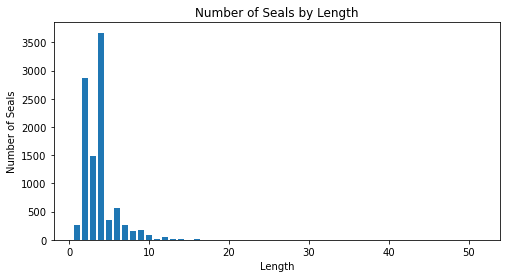

In [45]:
# seal_all_cleanlabel['length'].hist(bins=50)
sealbylen = seal_all_cleanlabel[['length', 'ownerOfSeal']].groupby(by='length', as_index=False).count()
sealbylen.rename(columns={'ownerOfSeal':'Number'}, inplace=True)
sealbylen
# plot as a bar plot
plt.figure(figsize=(8, 4))
plt.bar(sealbylen.length, sealbylen.Number)
plt.title('Number of Seals by Length')
plt.ylabel('Number of Seals')
plt.xlabel('Length')

### End with / contains 印，章，之印，之章，私印，印信，考藏印，藏书印，藏书之印，书画印，图书印

In [34]:
seal_all_cleanlabel['印'] = seal_all_cleanlabel['label_clean'].apply(lambda x: 1 if x[-1:]=='印' else np.nan)
seal_all_cleanlabel['章'] = seal_all_cleanlabel['label_clean'].apply(lambda x: 1 if x[-1:]=='章' else np.nan)
seal_all_cleanlabel['之印'] = seal_all_cleanlabel['label_clean'].apply(lambda x: 1 if x[-2:]=='之印' else np.nan)
seal_all_cleanlabel['之章'] = seal_all_cleanlabel['label_clean'].apply(lambda x: 1 if x[-2:]=='之章' else np.nan)
seal_all_cleanlabel['私印'] = seal_all_cleanlabel['label_clean'].apply(lambda x: 1 if x[-2:]=='私印' else np.nan)
seal_all_cleanlabel['印信'] = seal_all_cleanlabel['label_clean'].apply(lambda x: 1 if x[-2:]=='印信' else np.nan)
seal_all_cleanlabel['考藏印'] = seal_all_cleanlabel['label_clean'].apply(lambda x: 1 if '考藏印' in x else np.nan)
seal_all_cleanlabel['藏书印'] = seal_all_cleanlabel['label_clean'].apply(lambda x: 1 if '藏书印' in x else np.nan)
seal_all_cleanlabel['藏书之印'] = seal_all_cleanlabel['label_clean'].apply(lambda x: 1 if '藏书之印' in x else np.nan)
seal_all_cleanlabel['书画印'] = seal_all_cleanlabel['label_clean'].apply(lambda x: 1 if '书画印' in x else np.nan)
seal_all_cleanlabel['图书印'] = seal_all_cleanlabel['label_clean'].apply(lambda x: 1 if '图书印' in x else np.nan)
seal_all_cleanlabel.to_csv('seal_all_cleanlabel.csv')
seal_all_cleanlabel

,ownerOfSeal,label_clean,length,印,章,之印,之章,私印,印信,考藏印,藏书印,藏书之印,书画印,图书印
0,蒋风白,蒋风白写生记,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,高其佩,韦之,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,程正揆,揆,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,榭稚柳,塞北绕春,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,谭延闿,谭延闿印,4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,傅抱石,抱石,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,莫是龙,秋水亭,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,文徵明,徵明,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,项圣谟,项,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### if Name Seal

In [14]:
seal_all_cleanlabel[seal_all_cleanlabel['ownerOfSeal']==seal_all_cleanlabel['label_clean']]

,ownerOfSeal,label_clean,length,end_char
34,关山月,关山月,3,None
63,潘仕成,潘仕成,3,None
91,齐燕铭,齐燕铭,3,None
93,于希宁,于希宁,3,None
100,蒋祖诒,蒋祖诒,3,None
...,...,...,...,...
9942,汪统,汪统,2,None
9951,黄绍宪,黄绍宪,3,None
9960,关山月,关山月,3,None
9962,萧云从,萧云从,3,None


In [37]:
seal_all_cleanlabel[seal_all_cleanlabel['图书印']==1]

,ownerOfSeal,label_clean,length,印,章,之印,之章,私印,印信,考藏印,藏书印,藏书之印,书画印,图书印
1289,毕泷,静寄轩图书印,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1413,莫友芝,莫友芝图书印,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1801,笪重光,江上笪氏图书印,7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1932,张绍仁,清河郡图书印,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2663,爱新觉罗永瑆,皇十一子成亲王诒晋斋图书印,13,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3652,溥儒,省心斋图书印,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5511,法式善,诗龛居士存素堂图书印,10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5821,范大澈,范大澈图书印,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6617,莫友芝,莫友芝图书印,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6852,查昇,澹远堂图书印,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


<AxesSubplot:>

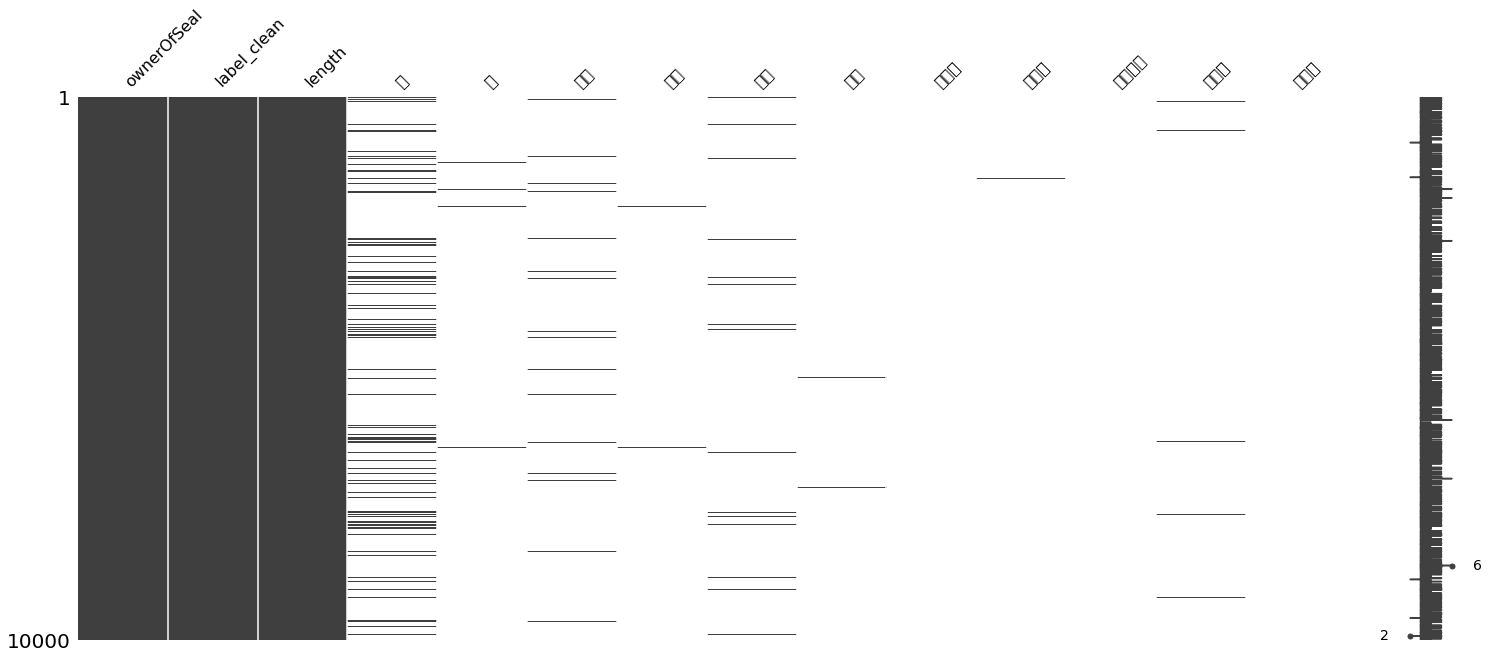

In [36]:
### Gives positional information of the missing values
import missingno as msno
msno.matrix(seal_all_cleanlabel)